# Prodigy_DS_02

Name: Yashika Tirkey


survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [474]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [475]:
train = pd.read_csv('Titanic/train (1).csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# ***Data Cleaning***

In [476]:
train.shape

(891, 12)

In [477]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [478]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [479]:
train.duplicated().sum()

0

In [480]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [481]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [482]:
train = train.drop(columns=['Cabin'])

In [483]:
#train.isnull().sum()

# ***Descriptive Statistics***

In [484]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# ***Removing Outliers***

In [485]:
import numpy as np
col = ['PassengerId','Survived','Pclass','SibSp','Parch','Fare']
for k, v in train[col].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(train)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column PassengerId outliers = 0.00%
Column Survived outliers = 0.00%
Column Pclass outliers = 0.00%
Column SibSp outliers = 5.16%
Column Parch outliers = 100.00%
Column Fare outliers = 13.02%


In [486]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [487]:
percentile25 = train['Parch'].quantile(0.25)
percentile75 = train['Parch'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
train['Parch'] = np.where( train['Parch']  > upper_limit,
                        upper_limit,
                        np.where( train['Parch']  < lower_limit,
                        lower_limit,
                        train['Parch']
                                ))


<Axes: xlabel='Parch'>

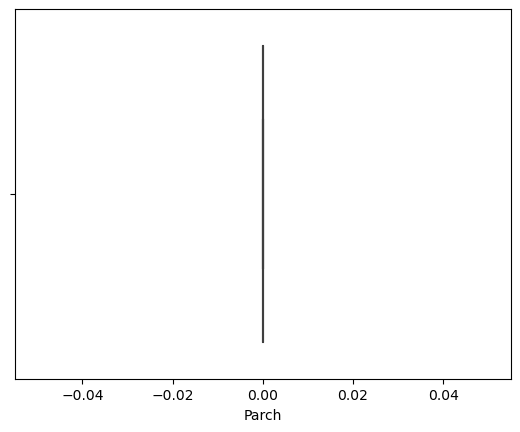

In [488]:
sns.boxplot(x=train['Parch'])

In [489]:
percentile25 = train['Fare'].quantile(0.25)
percentile75 = train['Fare'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
train['Fare'] = np.where( train['Fare']  > upper_limit,
                        upper_limit,
                        train['Fare']
                        )

<Axes: xlabel='Fare'>

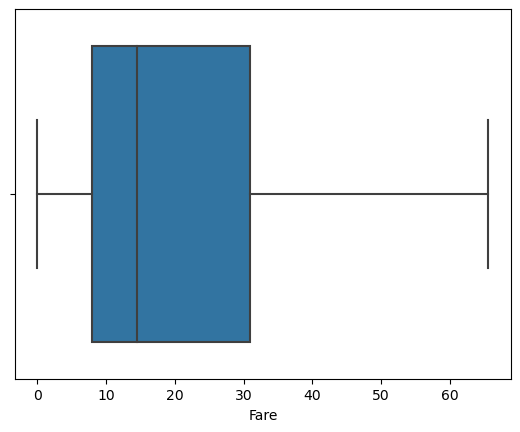

In [490]:
sns.boxplot(x=train['Fare'])

In [491]:
percentile25 = train['SibSp'].quantile(0.25)
percentile75 = train['SibSp'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
train['SibSp'] = np.where( train['SibSp']  > upper_limit,
                        upper_limit,
                        train['SibSp']
                        )

<Axes: xlabel='SibSp'>

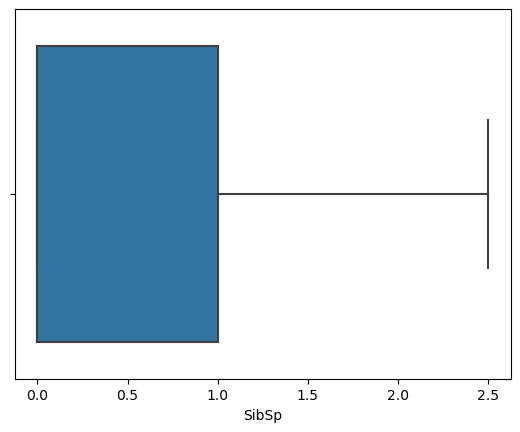

In [492]:
sns.boxplot(x=train['SibSp'])

# ***Data Visualization***

In [493]:
train['Survived/Died'] = train['Survived'].apply(lambda x: 'Died' if x == 0 else 'Survived')

In [494]:
train['Family'] = train['SibSp'] + train['Parch']

In [495]:
train = train.drop(columns=['SibSp','Parch'])

<Axes: ylabel='Survived/Died'>

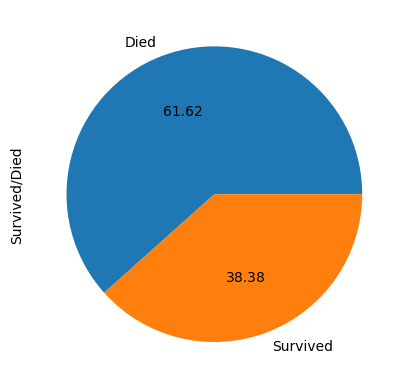

In [496]:
train['Survived/Died'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Sex', ylabel='count'>

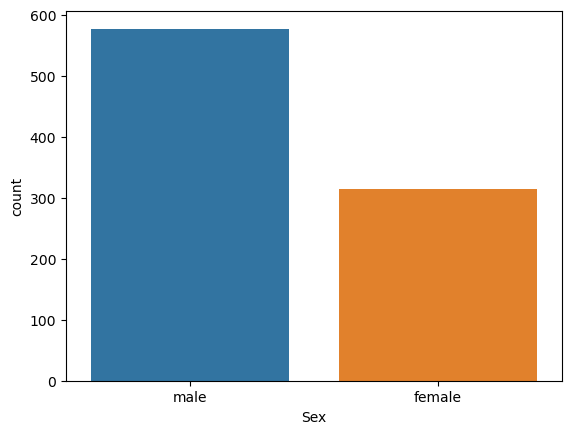

In [497]:
sns.countplot(x=train['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

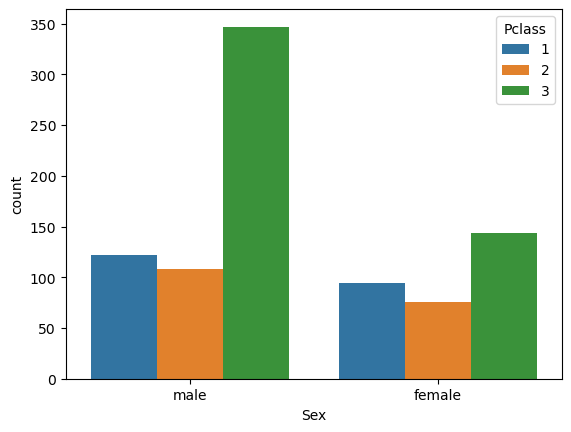

In [498]:
sns.countplot(x=train['Sex'],hue=train['Pclass'])

<Axes: xlabel='Embarked', ylabel='count'>

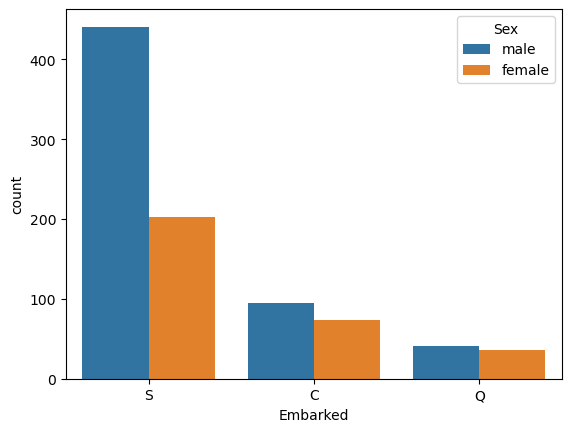

In [499]:
sns.countplot(x=train['Embarked'],hue=train['Sex'])

<Axes: xlabel='Survived/Died', ylabel='count'>

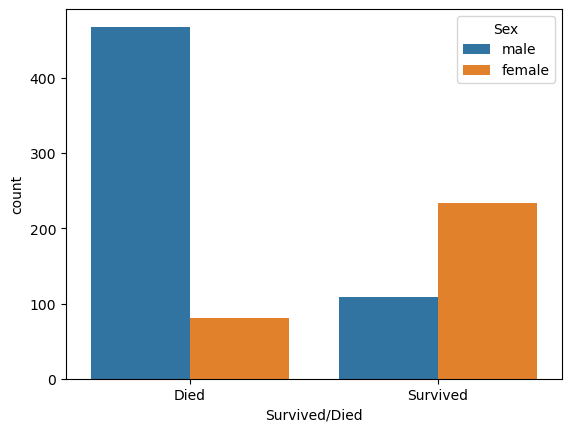

In [500]:
sns.countplot(x=train['Survived/Died'],hue=train['Sex'])

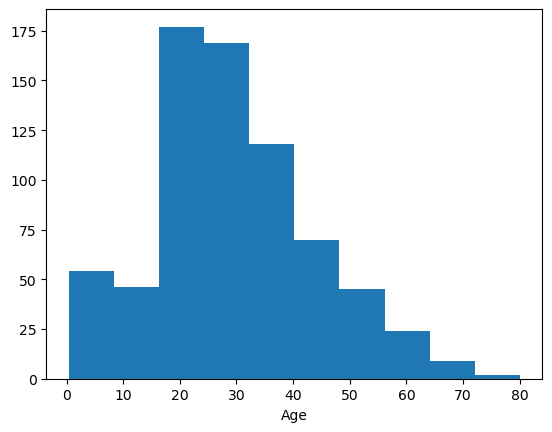

In [501]:
plt.hist(x=train['Age'])
plt.xlabel("Age")
plt.show()

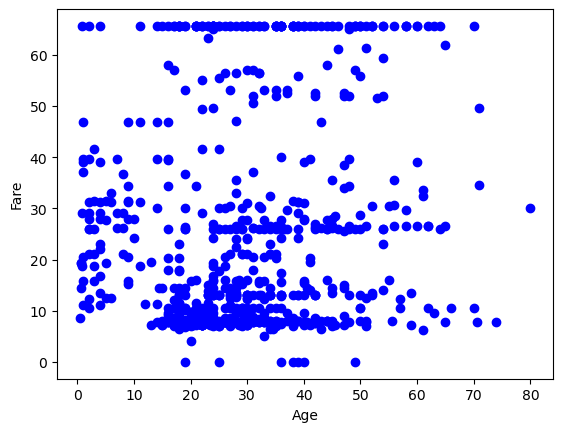

In [502]:
plt.scatter(x=train['Age'], y=train['Fare'], c ="blue")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

<Axes: xlabel='Family', ylabel='count'>

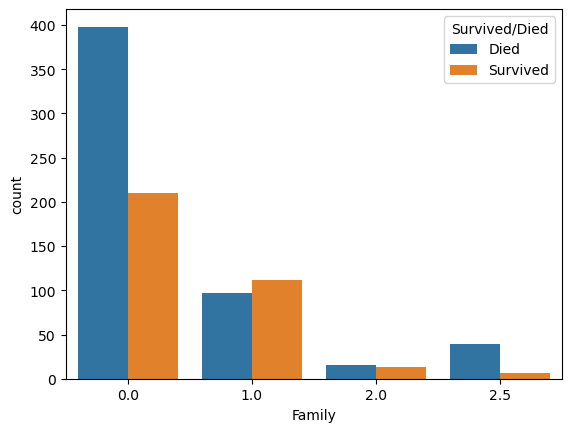

In [503]:
sns.countplot(x=train['Family'],hue=train['Survived/Died'])

<Axes: >

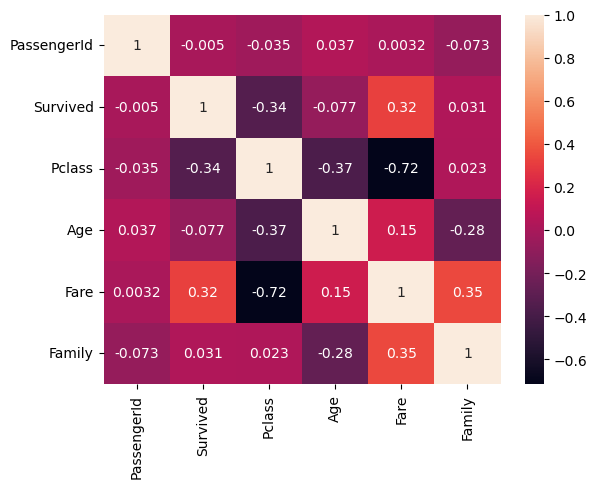

In [504]:
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True)

In [505]:
dataset = train
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(dataset, 0.75)
len(set(corr_features)) 

0

In [506]:
corr_features

set()

***Deleting unnecessary Columns***

In [507]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Survived/Died', 'Family'],
      dtype='object')

In [508]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN,strategy='mean')
train['Age'] = imputer.fit_transform(train['Age'].values.reshape(-1,1))[:,0]
train['Age'] 

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [509]:
train['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [510]:
train = train.drop(columns=['Ticket','Survived/Died'])

In [511]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       2
Family         0
dtype: int64

In [512]:
train = train.dropna()

In [513]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
 8   Family       889 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 69.5+ KB


In [514]:
train = train.drop(columns=['Name'])

In [ ]:
train['Embarked'] = train['Embarked'].astype('category')
train['Sex'] = train['Sex'].astype('category')
train['Survived'] = train['Survived'].astype('category')

# ***Machine Learning Model***

In [516]:
from sklearn import preprocessing
label_encounter = preprocessing.LabelEncoder()
train['Embarked'] = label_encounter.fit_transform(train['Embarked'])
train['Sex'] = label_encounter.fit_transform(train['Sex'])

In [517]:
x = train.drop(columns=['Survived'])
y = train['Survived']

In [518]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [519]:
x_train

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
551,552,2,1,27.000000,26.0000,2,0.0
399,400,2,0,28.000000,12.6500,2,0.0
599,600,1,1,49.000000,56.9292,0,1.0
777,778,3,0,5.000000,12.4750,2,0.0
196,197,3,1,29.699118,7.7500,1,0.0
...,...,...,...,...,...,...,...
716,717,1,0,38.000000,65.6344,0,0.0
890,891,3,1,32.000000,7.7500,1,0.0
749,750,3,1,31.000000,7.7500,1,0.0
406,407,3,1,51.000000,7.7500,2,0.0


In [520]:
y_train

551    0
399    1
599    1
777    1
196    0
      ..
716    1
890    0
749    0
406    0
739    0
Name: Survived, Length: 711, dtype: category
Categories (2, int64): [0, 1]

# ***Decision Tree Classifier*** 

In [550]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [551]:
dtc_y_predict = classifier.predict(x_test)

In [552]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of Decision Tree Classifier  : ", accuracy_score(dtc_y_predict,y_test))

Accuracy Score of Decision Tree Classifier  :  0.7584269662921348


In [553]:
output = pd.DataFrame({'Actual': y_test, 'Predicted':dtc_y_predict })

In [554]:
output.head(10)

,Actual,Predicted
680,0,1
64,0,1
486,1,1
411,0,0
360,0,0
274,1,1
512,1,1
763,1,1
600,1,1
413,0,0


# ***Random Forest Classifier***

In [558]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [559]:
rfc_y_predict = rfc_model.predict(x_test)

In [560]:
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(rfc_y_predict,y_test))

Accuracy Score of Random Forest Classifier :  0.8370786516853933


In [561]:
output = pd.DataFrame({'Actual': y_test, 'Predicted':dtc_y_predict })

In [562]:
output.head(10)

,Actual,Predicted
680,0,1
64,0,1
486,1,1
411,0,0
360,0,0
274,1,1
512,1,1
763,1,1
600,1,1
413,0,0


# ***SVM***

In [563]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear',random_state=0)
svc_model.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [564]:
svc_y_predict = svc_model.predict(x_test)

In [565]:
print("Accuracy Score of Support Vector Classifier : ", accuracy_score(svc_y_predict,y_test))

Accuracy Score of Support Vector Classifier :  0.7865168539325843


In [566]:
output = pd.DataFrame({'Actual': y_test, 'Predicted':svc_y_predict })

In [567]:
output.head(10)

,Actual,Predicted
680,0,1
64,0,0
486,1,1
411,0,0
360,0,0
274,1,1
512,1,0
763,1,1
600,1,1
413,0,0


# ***Logistic Regression***

In [568]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [569]:
lr_y_predict = lr.predict(x_test)

In [570]:
print("Accuracy Score of Logistic Regression : ", accuracy_score(lr_y_predict,y_test))

Accuracy Score of Logistic Regression :  0.7921348314606742


In [571]:
output = pd.DataFrame({'Actual': y_test, 'Predicted':lr_y_predict })
output.head(10)

,Actual,Predicted
680,0,1
64,0,0
486,1,1
411,0,0
360,0,0
274,1,1
512,1,0
763,1,1
600,1,1
413,0,0


# ***KNN***

In [572]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()  
knn.fit(x_train, y_train)  

KNeighborsClassifier()

In [573]:
knn_predict = knn.predict(x_test)

In [574]:
print("Accuracy Score of Knn : ", accuracy_score(knn_predict,y_test))

Accuracy Score of Knn :  0.651685393258427


In [575]:
output = pd.DataFrame({'Actual': y_test, 'Predicted':knn_predict })
output.head(10)

,Actual,Predicted
680,0,0
64,0,1
486,1,1
411,0,0
360,0,0
274,1,0
512,1,1
763,1,1
600,1,1
413,0,0
